### Multi-Class Classifier using CNN

About this notebook: 
The task is to perform image classification using a convolutional neural network.

### Tags: Convolutional Neural Network (CNN), Image Classification, Supervised Learning, Keras, Optimization, Regularization, Numpy, Matplotlib

### Import Libraries

In [6]:
#Import dependencies
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

### Get the data

In [2]:
#Get the dataset 
#Dataset has 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
from keras.datasets import cifar10

#The dataset is already split into train and test sets
#Unpack the data as follows
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

### View the shape of train and test data

In [5]:
#Check the shape of x_train, y_train, x_test and y_test
for i in (x_train, y_train, x_test, y_test):
    print(i.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [12]:
# Height and width of the images
image_size = 32
# 3 channels, Red, Green and Blue
channels = 3
#Number of output classes
num_classes = 10

### Define the Model

In [13]:
#Define the model
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_size,image_size,channels)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25)) #Regularization to prevent overfitting 

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25)) 

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu')) #Fully connected layer
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax')) #Output layer
    
    model.summary()
    
    return model

### Build the model

In [14]:
#Lets build the model
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### Train the Model on the Training Data

In [17]:
checkpoint = ModelCheckpoint('best_model_simple.h5',  #model filename
                             monitor='val_loss', #quantity to monitor
                             verbose=0, #verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [18]:
model.compile(loss='categorical_crossentropy', #Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), #Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) #Metrics to be evaluated by the model

In [22]:
#One hot encode output
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

# define example
class_train = y_train
class_train = array(class_train)
class_test = y_test
class_test = array(class_test)
print(class_train)
print(class_test)

# one hot encode
encoded_train = to_categorical(class_train)
print(encoded_train)
encoded_test = to_categorical(class_test)
print(encoded_test)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


### Fit the model on training data

In [24]:
#Fit model to CIFAR-10
model_details = model.fit(x_train, encoded_train,
                    batch_size = 32, #number of samples per gradient update
                    epochs = 10, #number of iterations
                    validation_data= (x_test, encoded_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2826s 57ms/step - loss: 1.6122 - acc: 0.4141 - val_loss: 1.4181 - val_acc: 0.4885
Epoch 2/10
50000/50000 [==============================] - 2838s 57ms/step - loss: 1.4173 - acc: 0.4910 - val_loss: 1.2953 - val_acc: 0.5416
Epoch 3/10
50000/50000 [==============================] - 24310s 486ms/step - loss: 1.2828 - acc: 0.5448 - val_loss: 1.1732 - val_acc: 0.5828
Epoch 4/10
50000/50000 [==============================] - 3824s 76ms/step - loss: 1.1811 - acc: 0.5820 - val_loss: 1.1226 - val_acc: 0.6080
Epoch 5/10
50000/50000 [==============================] - 4021s 80ms/step - loss: 1.0955 - acc: 0.6178 - val_loss: 0.9928 - val_acc: 0.6583
Epoch 6/10
50000/50000 [==============================] - 2876s 58ms/step - loss: 1.0198 - acc: 0.6443 - val_loss: 0.9992 - val_acc: 0.6483
Epoch 7/10
50000/50000 [==============================] - 6400s 128ms/step - loss: 0.9679 - acc: 0.6623 - va

### Evaluate model accuracy

In [28]:
#Evaluate model accuracy
scores = model.evaluate(x_test, encoded_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 72.14%


### Plot the resulting loss and accuracy

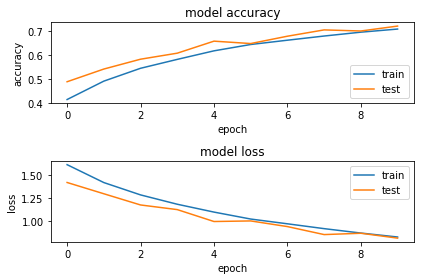

In [29]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_details.history['acc'])
plt.plot(model_details.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_details.history['loss'])
plt.plot(model_details.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig
plt.show()